## Import Library & Dataset

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import zscore
from scipy import stats

In [74]:
#import Dataset
df = pd.read_csv('IQ_GPA_and_Gender.csv')
df.head()

,obs,gpa,iq,gender,concept
0,1,7.940,111,2,67
1,2,8.292,107,2,43
2,3,4.643,100,2,52
3,4,7.470,107,2,66
4,5,8.882,114,1,58


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   obs      78 non-null     int64  
 1   gpa      78 non-null     float64
 2   iq       78 non-null     int64  
 3   gender   78 non-null     int64  
 4   concept  78 non-null     int64  
dtypes: float64(1), int64(4)
memory usage: 3.2 KB


In [76]:
df.describe()

,obs,gpa,iq,gender,concept
count,78.000000,78.000000,78.000000,78.000000,78.000000
mean,42.974359,7.446538,108.923077,1.602564,56.961538
std,25.889864,2.099557,13.170973,0.492535,12.412229
min,1.000000,0.530000,72.000000,1.000000,20.000000
25%,20.250000,6.278000,103.000000,1.000000,51.000000
50%,42.000000,7.829000,110.000000,2.000000,59.500000
75%,62.750000,8.983000,117.500000,2.000000,66.000000
max,89.000000,10.760000,136.000000,2.000000,80.000000


## Data Visualization

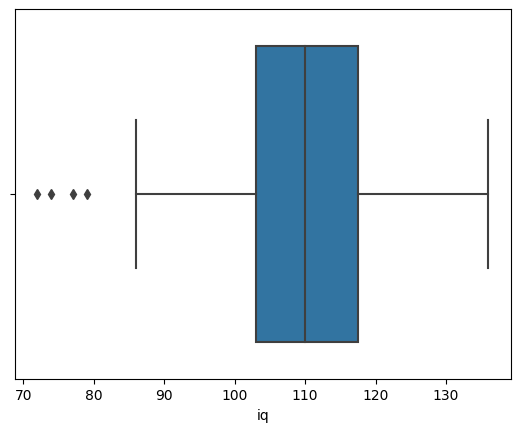

In [77]:
sns.boxplot(data=df, x="iq")
plt.show()

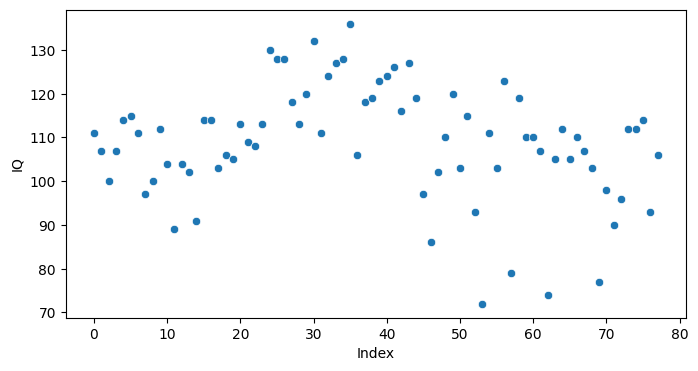

In [78]:
# Buat scatter plot
plt.figure(figsize=(8, 4))
sns.scatterplot(x=df.index, y=df["iq"])

# Atur label sumbu
plt.xlabel("Index")
plt.ylabel("IQ")

# Tampilkan plot
plt.show()

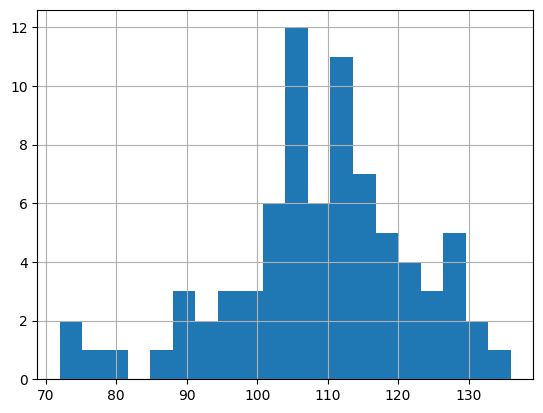

In [79]:
df["iq"].hist(bins=20)
plt.show()

In [80]:
columns = ['iq']
outlier_percentage = {}

for column in columns:
    column_data = df[column]

    Q1 = np.percentile(column_data, 25)
    Q3 = np.percentile(column_data, 75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = column_data[(column_data < lower) | (column_data > upper)]
    outlier_percentage[column] = len(outliers) / len(column_data) * 100

# Display the outlier percentage for each column
for column, percentage in outlier_percentage.items():
    print(f"Count of outliers in column '{column}': {len(outliers)}")
    print(f"Percentage of outliers in column '{column}': {percentage:.2f}%")
    print()
    print(f"Lower : {lower}")
    print(f"Upper : {upper}")
    print()
    print(f"Data Outlier': {np.array(outliers)}")

Count of outliers in column 'iq': 4
Percentage of outliers in column 'iq': 5.13%

Lower : 81.25
Upper : 139.25

Data Outlier': [72 79 74 77]


## New Dataset

In [81]:
# Menentukan mean dan standar deviasi
mean_iq = 100
std_dev_iq = 15

# Membuat dataset dengan distribusi normal
np.random.seed(0) # untuk hasil yang konsisten
data_iq = np.random.normal(mean_iq, std_dev_iq, 1000)

# Membuat DataFrame dari data
new_df = pd.DataFrame(data_iq, columns=['IQ'])

# Menampilkan 5 baris pertama dari DataFrame
print(df.head())


   obs    gpa   iq  gender  concept
0    1  7.940  111       2       67
1    2  8.292  107       2       43
2    3  4.643  100       2       52
3    4  7.470  107       2       66
4    5  8.882  114       1       58


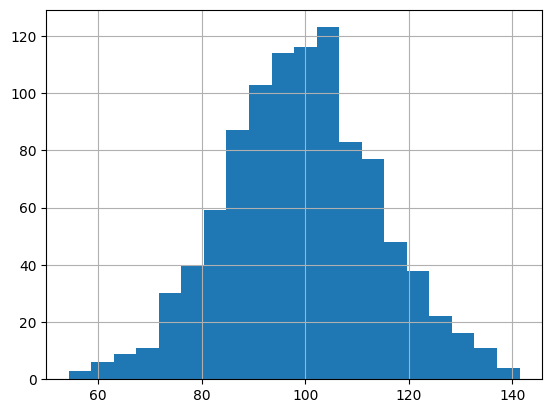

In [82]:
new_df["IQ"].hist(bins=20)
plt.show()

In [83]:
# Menghitung Z-score
z_scores = zscore(new_df['IQ'])

# Menentukan batas untuk outlier, misalnya nilai absolut dari Z-score > 3
batas_atas = new_df['IQ'].mean() + 3*new_df['IQ'].std()
batas_bawah = new_df['IQ'].mean() - 3*new_df['IQ'].std()

# Menampilkan batas atas dan bawah
print("Batas Atas: ", batas_atas)
print("Batas Bawah: ", batas_bawah)

# Menemukan outlier
outliers = np.where(np.abs(z_scores) > 3)

# Menampilkan outlier
print("Outlier: ", np.array(new_df['IQ'].iloc[outliers]))


Batas Atas:  143.75986644390017
Batas Bawah:  54.88243233139401
Outlier:  [54.30785418]


## Handle Outlier

### Remove Outlier

In [84]:
columns = ['iq']

for column in columns:
    column_data = df[column]

    Q1 = np.percentile(column_data, 25)
    Q3 = np.percentile(column_data, 75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Menemukan outlier
    outliers = column_data[(column_data < lower) | (column_data > upper)]

    # Menghapus outlier
    df_no_outliers = df[(column_data >= lower) & (column_data <= upper)]

    # Menampilkan dataset tanpa outlier
    print(df_no_outliers)

    obs    gpa   iq  gender  concept
0     1  7.940  111       2       67
1     2  8.292  107       2       43
2     3  4.643  100       2       52
3     4  7.470  107       2       66
4     5  8.882  114       1       58
..  ...    ...  ...     ...      ...
73   85  9.000  112       1       60
74   86  9.500  112       1       70
75   87  6.057  114       2       51
76   88  6.057   93       1       21
77   89  6.938  106       2       56

[74 rows x 5 columns]


In [85]:
columns = ['iq']
outlier_percentage = {}

for column in columns:
    column_data = df_no_outliers[column]

    Q1 = np.percentile(column_data, 25)
    Q3 = np.percentile(column_data, 75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = column_data[(column_data < lower) | (column_data > upper)]
    outlier_percentage[column] = len(outliers) / len(column_data) * 100

# Display the outlier percentage for each column
for column, percentage in outlier_percentage.items():
    print(f"Count of outliers in column '{column}': {len(outliers)}")
    print(f"Percentage of outliers in column '{column}': {percentage:.2f}%")
    print()
    print(f"Lower : {lower}")
    print(f"Upper : {upper}")
    print()
    print(f"Data Outlier': {np.array(outliers)}")

Count of outliers in column 'iq': 0
Percentage of outliers in column 'iq': 0.00%

Lower : 83.0
Upper : 139.0

Data Outlier': []


### Imputation - Median

In [86]:
df_median = df.copy()

for column in columns:
    column_data = df_median[column]

    Q1 = np.percentile(column_data, 25)
    Q3 = np.percentile(column_data, 75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Menemukan outlier
    outliers = column_data[(column_data < lower) | (column_data > upper)]

    # Menghitung median
    median = column_data.median()

    # Mengganti outlier dengan median
    column_data[(column_data < lower) | (column_data > upper)] = median

    # Menampilkan data setelah penggantian outlier
    print(df_median)


    obs    gpa   iq  gender  concept
0     1  7.940  111       2       67
1     2  8.292  107       2       43
2     3  4.643  100       2       52
3     4  7.470  107       2       66
4     5  8.882  114       1       58
..  ...    ...  ...     ...      ...
73   85  9.000  112       1       60
74   86  9.500  112       1       70
75   87  6.057  114       2       51
76   88  6.057   93       1       21
77   89  6.938  106       2       56

[78 rows x 5 columns]


C:\Users\USER\AppData\Local\Temp\ipykernel_22092\2803660232.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column_data[(column_data < lower) | (column_data > upper)] = median


In [87]:
columns = ['iq']
outlier_percentage = {}

for column in columns:
    column_data = df_median[column]

    Q1 = np.percentile(column_data, 25)
    Q3 = np.percentile(column_data, 75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = column_data[(column_data < lower) | (column_data > upper)]
    outlier_percentage[column] = len(outliers) / len(column_data) * 100

# Display the outlier percentage for each column
for column, percentage in outlier_percentage.items():
    print(f"Count of outliers in column '{column}': {len(outliers)}")
    print(f"Percentage of outliers in column '{column}': {percentage:.2f}%")
    print()
    print(f"Lower : {lower}")
    print(f"Upper : {upper}")
    print()
    print(f"Data Outlier': {np.array(outliers)}")

Count of outliers in column 'iq': 0
Percentage of outliers in column 'iq': 0.00%

Lower : 84.375
Upper : 137.375

Data Outlier': []
